<div style="text-align: center;">
<h1>Assignment 3: Block Ciphers</font></h1>
<h2>Course: Elements of Applied Data Security</font></h2>

<center><img src="../images/unibo.png" alt="unibo_logo" width="200"/></center>

<h3>Professor: Alex Marchioni and Livia Manovi</font></h3>
<h3>University: Università degli Studi di Bologna</font></h3>
<h3>Author: Lluis Barca Pons</font></h3>
<h3>Date: 2024-05-07</font></h3>
</div>

## Importing libraries

In [57]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad

from matplotlib.image import imread
from matplotlib import pyplot as plt
import numpy as np
import io


# Part 1: Advanced Encryption Standard (AES)

## Input data

First we will plot the original image in order to see how it looks like.

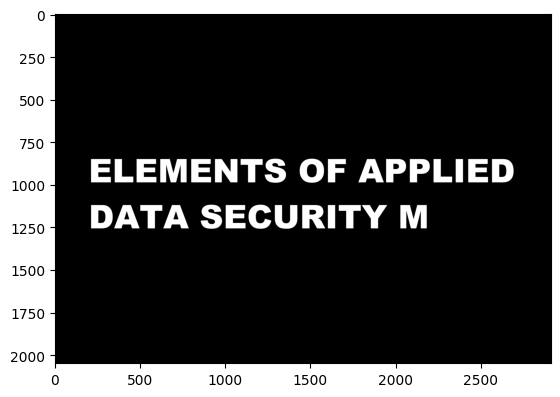

In [58]:
image = imread('../images/image.png').mean(axis=-1)

# Plot the original image
plt.imshow(image, cmap='gray')
plt.show()

Now we will convert this image in a numpy matrix array in order to be able to manipulate it.

In [59]:
image = 255 * image.astype(np.uint8)
print(image.shape)

(2048, 2912)


Padding the image data to be a multiple of the block size

In [60]:
image_bytes = image.tobytes()
image_data = np.array([byte for byte in image_bytes]).reshape(image.shape)

Key and IV generation

In [61]:
key = get_random_bytes(16)
iv = get_random_bytes(16)

In [62]:
def display_cipher_image(cipher_data, shape):
    cipher_image = np.frombuffer(cipher_data, dtype=np.uint8).reshape(shape)
    plt.imshow(cipher_image, cmap='gray')
    plt.show()

### Encryption using ECB mode

In [63]:
ecb = AES.new(key, AES.MODE_ECB)
encrypted_ecb = ecb.encrypt(image_data)
display_cipher_image(encrypted_ecb, image.shape)

TypeError: Object type <class 'numpy.ndarray'> cannot be passed to C code

### Encryption using CBC mode

### Encryption using CFB mode

### Encryption using CTR mode

# Part2: Monte Carlo Simulations

# Part 3: Diffusion and Confusion with AES